In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('telco_churn.csv')

In [6]:
df['gender'] = df['gender'].astype('category')
df['gender_cat'] = df['gender'].cat.codes

df['InternetService'] = df['InternetService'].astype('category')
df['InternetService_cat'] = df['InternetService'].cat.codes

df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineSecurity_cat'] = df['OnlineSecurity'].cat.codes

df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)
cols = ['MonthlyCharges', 'tenure', 'gender_cat', 'InternetService_cat', 'OnlineSecurity_cat']

In [7]:
from sklearn.model_selection import train_test_split
X = df[cols]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

class CustomClassifier(RandomForestClassifier):
    def __init__(self, test_size=0.2, **kwargs):
        super().__init__(**kwargs)
        self.test_size = test_size
        
    def split_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.test_size, random_state=42)

In [12]:
rf_model = CustomClassifier(0.2)
rf_model.split_data()
rf_model.fit(rf_model.X_train, rf_model.y_train)

CustomClassifier()

In [13]:
importances = dict(zip(rf_model.feature_names_in_, rf_model.feature_importances_))
print("Feature Importances: ", importances)

Feature Importances:  {'MonthlyCharges': 0.5180558283262937, 'tenure': 0.3413313756123183, 'gender_cat': 0.016723313513091347, 'InternetService_cat': 0.041761327477205484, 'OnlineSecurity_cat': 0.08212815507109114}


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class Model:
    def __init__(self):
        self.n_estimators = 10
        self.max_depth = 10
        self.y_test = y_test
        self.y_train = y_train
        self.X_train = X_train
        self.X_test = X_test
    def fit(self):
        self.model = RandomForestClassifier(n_estimators = self.n_estimators, max_depth = self.max_depth, random_state=42)
        self.model.fit(self.X_train, self.y_train)

    def predict(self):
        self.y_pred = self.model.predict(X_test) 
        return self.y_pred       
            

In [21]:
class ModelVisualization(Model):
    def __init__(self):
        super().__init__()

    def generate_confusion_matrix(self):
        cm = confusion_matrix(self.y_test, self.y_pred)
        cm = cm / cm.astype(np.float).sum(axis=1)
        sns.heatmap(cm, annot=True, cmap='Blues')

/tmp/ipykernel_81/4231721142.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = cm / cm.astype(np.float).sum(axis=1)


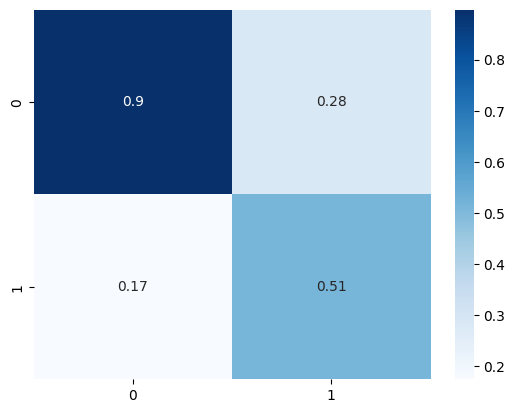

In [22]:
results = ModelVisualization()
results.fit()
results.predict()
results.generate_confusion_matrix()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e5d49e9-14d8-44ff-8c4d-811ce514e235' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>